In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')  # 한글폰트 설정 "맑은 고딕"
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

data = pd.read_csv('../data/data_mental.csv')

## 데이터 전처리

In [3]:
# 데이터 추출
md = data[['sex', 'age', '위험군_분류','스트레스_인지', 'PHQ_점수', 'GAD_점수', '주중 수면 시간']]
md.head(5)

,sex,age,위험군_분류,스트레스_인지,PHQ_점수,GAD_점수,주중 수면 시간
0,1,66,정상,0.0,0.0,0.0,9.0
1,2,62,정상,0.0,0.0,0.0,7.0
2,2,61,정상,1.0,0.0,0.0,5.0
3,2,22,정상,1.0,3.0,3.0,5.0
4,2,53,정상,0.0,0.0,3.0,6.0


In [4]:
# 데이터 추출
md2 = data[['sex', 'age', '위험군_분류','스트레스_인지', 'PHQ_점수', 'GAD_점수', '주말 수면 시간']]
md2.head(5)

KeyError: "['주말 수면 시간'] not in index"

In [ ]:
# 데이터 이상치 제거
# 사분위수(IQR)를 활용한 이상치 제거
Q1 = md['주중 수면 시간'].quantile(0.25)
Q3 = md['주중 수면 시간'].quantile(0.75)
IQR = Q3 - Q1
md = md[(md['주중 수면 시간'] >= Q1 - 1.5 * IQR) & (md['주중 수면 시간'] <= Q3 + 1.5 * IQR)]
md.head()

,sex,age,위험군_분류,스트레스_인지,PHQ_점수,GAD_점수,주중 수면 시간
0,1,66,정상,0.0,0.0,0.0,9.0
1,2,62,정상,0.0,0.0,0.0,7.0
2,2,61,정상,1.0,0.0,0.0,5.0
3,2,22,정상,1.0,3.0,3.0,5.0
4,2,53,정상,0.0,0.0,3.0,6.0


In [ ]:
# 데이터 이상치 제거
# 사분위수(IQR)를 활용한 이상치 제거
Q1 = md2['주말 수면 시간'].quantile(0.25)
Q3 = md2['주말 수면 시간'].quantile(0.75)
IQR = Q3 - Q1
md2= md2[(md2['주말 수면 시간'] >= Q1 - 1.5 * IQR) & (md2['주말 수면 시간'] <= Q3 + 1.5 * IQR)]
md2.head()

,sex,age,위험군_분류,스트레스_인지,PHQ_점수,GAD_점수,주말 수면 시간
0,1,66,정상,0.0,0.0,0.0,9.0
1,2,62,정상,0.0,0.0,0.0,9.0
2,2,61,정상,1.0,0.0,0.0,6.0
6,2,48,정상,0.0,1.0,0.0,6.0
8,1,46,정상,0.0,0.0,0.0,8.0


In [ ]:
# 데이터 결측치 제거
md.dropna()
md

,sex,age,위험군_분류,스트레스_인지,PHQ_점수,GAD_점수,주중 수면 시간
0,1,66,정상,0.0,0.0,0.0,9.0
1,2,62,정상,0.0,0.0,0.0,7.0
2,2,61,정상,1.0,0.0,0.0,5.0
3,2,22,정상,1.0,3.0,3.0,5.0
4,2,53,정상,0.0,0.0,3.0,6.0
...,...,...,...,...,...,...,...
4407,1,33,위험,1.0,5.0,16.0,6.0
4408,1,53,위험,1.0,15.0,9.0,7.0
4409,2,55,위험,1.0,9.0,21.0,8.0
4410,2,67,위험,1.0,15.0,0.0,9.0


In [5]:
# 데이터 결측치 제거
md2.dropna()
md2

NameError: name 'md2' is not defined

## 상관관계

          주중 수면 시간    PHQ_점수    GAD_점수
주중 수면 시간  1.000000 -0.116618 -0.059644
PHQ_점수   -0.116618  1.000000  0.474332
GAD_점수   -0.059644  0.474332  1.000000


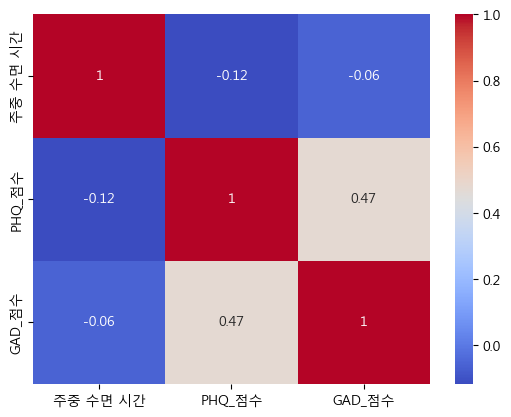

In [6]:
# 주중 수면 시간 칼럼과 phq 점수, gad 점수 간의 상관관계
corr_md = md[['주중 수면 시간', 'PHQ_점수', 'GAD_점수']].corr(method= 'spearman')
print(corr_md)
sns.heatmap(corr_md, annot = True, cmap = 'coolwarm')
plt.show()

In [9]:
# 주말 수면 시간 칼럼과 phq 점수, gad 점수 간의 상관관계
corr_md2 = md2[['주말 수면 시간', 'PHQ_점수', 'GAD_점수']].corr(method= 'spearman')
print(corr_md2)
sns.heatmap(corr_md2, annot = True, cmap = 'coolwarm')
plt.show()

NameError: name 'md2' is not defined

## 데이터 시각화

<Axes: xlabel='위험군_분류', ylabel='주중 수면 시간'>

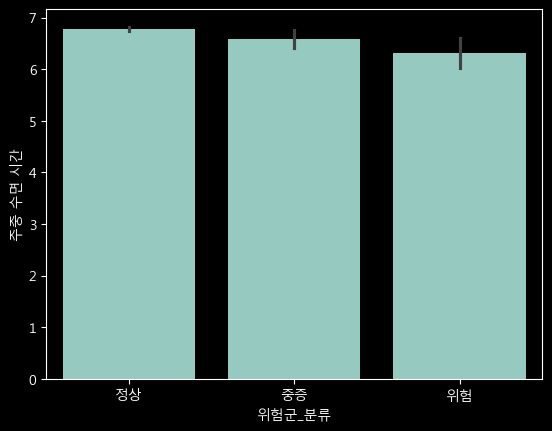

In [32]:
# 위험군 분류 그룹별 주중 수면 시간 barplot
sns.barplot(data = md, x = '위험군_분류', y = '주중 수면 시간')

### 막대그래프 분석 (Barplot 기준)
- 정상군이 가장 높은 평균 수면시간(약 7시간)을 보임

- 중증군은 정상군보다 약간 낮은 수준으로 유사한 평균값을 가짐

- 위험군은 평균 수면시간이 약 6시간으로, 정상군보다 1시간 가까이 짧음

- 세 집단 간 수면시간 평균 차이가 시각적으로 명확하며, 특히 위험군의 수면시간 저하 경향이 뚜렷하게 나타남

- 오차막대도 정상군과 위험군 사이의 겹침이 거의 없거나 미약

- 통계적으로도 유의한 차이가 존재할 가능성이 높음

<Axes: xlabel='위험군_분류', ylabel='주중 수면 시간'>

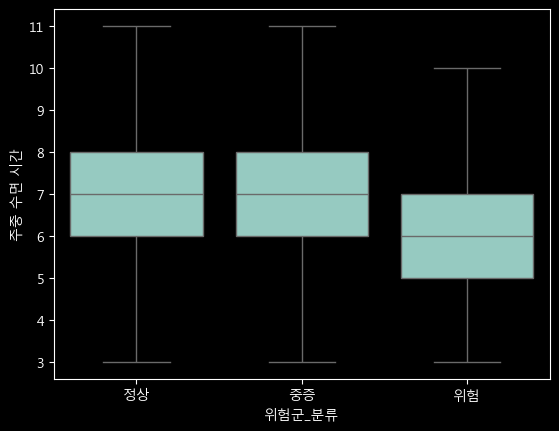

In [33]:
# 위험군 분류 그룹별 주중 수면 시간 boxplot
sns.boxplot(data = md, x = '위험군_분류', y = '주중 수면 시간')

### Boxplot 분석 
- 중앙값 기준으로, 정상군과 중증군은 약 7시간, 위험군은 약 6시간으로 더 낮은 수면시간을 보임 <br>
→ 위험군의 중심 경향이 하향 이동되어 있음

- 사분위수 범위 (IQR):
    - 정상군·중증군: 약 6시간 ~ 8시간
    - 위험군: 약 5시간 ~ 7시간

    → 위험군의 1사분위(하위 25%) 지점이 5시간으로 더 낮아,  수면 부족에 해당하는 비율이 높은 것으로 해석 가능

- 최소~최대값 범위는 세 집단 모두 유사하게 나타나지만, <br> 위험군은 최대 수면시간이 약간 낮고, 전체 분포가 하위 구간에 밀집된 경향을 보임

- 전체적으로 위험군의 수면시간 분포는 왼쪽(수면 부족 방향)으로 이동해 있음.

In [34]:
# 수면 시간을 기준 구간(3~5, 6~8, 9~11)에 따라 '부족', '정상', '과다'로 범주화시킨 칼럼을 새로 추가
sleep_cut = [3, 6, 9, 12]   
md.loc[:, '수면시간_분류'] = pd.cut(data['주중 수면 시간'], sleep_cut, labels = ['부족', '정상', '과다'], right = False)
md.head(5)

,sex,age,위험군_분류,스트레스_인지,PHQ_점수,GAD_점수,주중 수면 시간,수면시간_분류
0,1,66,정상,0.0,0.0,0.0,9.0,과다
1,2,62,정상,0.0,0.0,0.0,7.0,정상
2,2,61,정상,1.0,0.0,0.0,5.0,부족
3,2,22,정상,1.0,3.0,3.0,5.0,부족
4,2,53,정상,0.0,0.0,3.0,6.0,정상


In [35]:
# 위험군_분류별 수면시간_분류 비율(%) 계산
ct_ratio = pd.crosstab(md['위험군_분류'], md['수면시간_분류'], normalize= 'index').round(3) * 100
ct_ratio


수면시간_분류,부족,정상,과다
위험군_분류,,,
위험,33.9,55.4,10.7
정상,13.5,81.0,5.5
중증,23.2,70.3,6.5


<Axes: xlabel='위험군_분류', ylabel='비율'>

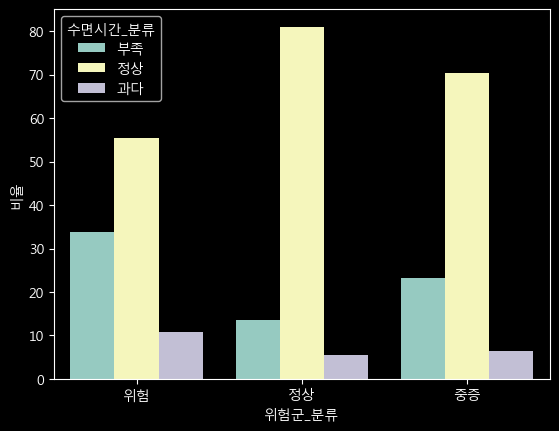

In [36]:
# 교차표 데이터를 .melt 함수로 재구조화 후 비율 시각화
ct_ratio = ct_ratio.reset_index().melt(id_vars='위험군_분류', var_name='수면시간_분류', value_name='비율')
sns.barplot(data=ct_ratio, x='위험군_분류', y='비율', hue='수면시간_분류')

### Barplot 분석 – 정신건강 위험군 분류별 수면시간 비율 분포
- 정상 수면 비율(6~9시간 기준)은 정상군이 약 80%로 가장 높고, 중증군은 약 70%, 위험군은 약 56%로 나타남.

→ 정신건강 상태가 나쁠수록 정상 수면 비율이 점진적으로 낮아지는 경향이 뚜렷하게 드러남.

- 수면 부족(3~6시간) 비율은 위험군이 약 34%로 가장 높고, 중증군은 약 24%, 정상군은 약 14% 수준임.

→ 위험군은 수면 부족 비율이 정상군의 약 2.5배 수준으로 매우 높아,
정신건강 위험이 높을수록 수면 부족 상태에 처할 가능성이 크다는 점을 시각적으로 보여줌.

- 과다 수면(9시간 이상) 비율은 전체적으로 낮으며(5~10% 수준), 집단 간 차이가 크지 않음.

→ 수면시간에서 드러나는 주요 차이는 ‘부족’과 ‘정상’ 구간의 비율 차이에 집중됨.

- 전반적으로, 정신건강이 악화될수록 수면시간이 부족해지는 방향으로 비율이 이동하며, 정상적인 수면패턴을 유지하는 비율이 감소하는 양상이 뚜렷하게 관찰된다.

## 샘플 추출

그래프 시각화와 카이제곱 가설검정의 공정한 비교를 위해,
세 집단(정상, 중증, 위험)의 표본 수를 동일하게 맞추어 샘플을 추출함

In [37]:
# '위험' 그룹의 표본 수를 기준으로 '정상' 및 '중증' 그룹에서 동일한 수만큼 무작위 추출
normal = md[md['위험군_분류'] == '정상']
mid = md[md['위험군_분류'] == '중증']
risk = md[md['위험군_분류'] == '위험']

n = len(risk)

sample_n = normal.sample(n = n, replace= False, random_state= 42)
sample_m = mid.sample(n = n, replace= False, random_state= 42)

sample = pd.concat([sample_n, sample_m, risk])

<Axes: xlabel='위험군_분류', ylabel='주중 수면 시간'>

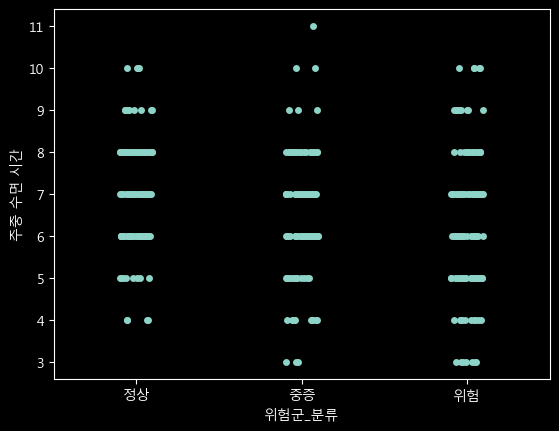

In [38]:
sns.stripplot(data = sample, x='위험군_분류', y='주중 수면 시간')

/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='위험군_분류', ylabel='주중 수면 시간'>

/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 32.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


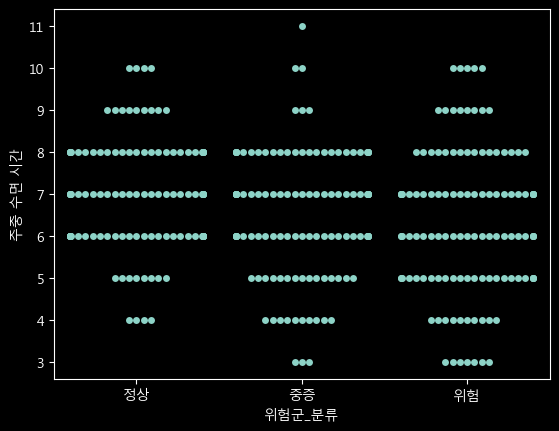

In [39]:
sns.swarmplot(data = sample, x='위험군_분류', y='주중 수면 시간')

### Swarmplot / Stripplot 분석
- 정상군은 7시간대에 수면시간이 집중되어 있고, 위험군은 5~6시간대에 밀집되어 수면시간이 더 짧은 경향을 보임
- 위험군은 수면 부족(3~5시간) 비율이 높고, 전체 분포가 하단으로 치우쳐 있음
- 정신건강이 악화될수록 수면시간이 줄어드는 경향이 시각적으로도 명확히 드러남

## 가설검정

In [40]:
# 위험군 분류와 수면시간 분류 간의 독립성 여부를 카이제곱 검정으로 확인(원본)
ct = pd.crosstab(md['위험군_분류'], md['수면시간_분류'])
chi2, p, dof, expected = sp.stats.chi2_contingency(ct)
print(ct, end= '\n\n')
print(f"Chi2 통계량: {chi2:.3f}")
print(f"p-value: {p:.4f}")
print(f"자유도: {dof}")

수면시간_분류   부족    정상   과다
위험군_분류                 
위험        41    67   13
정상       545  3265  223
중증        57   173   16

Chi2 통계량: 64.770
p-value: 0.0000
자유도: 4


### 가설검정 결과(카이제곱) : 원본
- 가설 설정 <br>
귀무가설(H₀): 정신건강 위험군 분류와 수면시간 분류는 서로 독립적이다 (즉, 관계가 없다). <br>
대립가설(H₁): 정신건강 위험군 분류와 수면시간 분류는 독립적이지 않다 (즉, 관계가 있다).

- 검정 결과 <br>
Chi² 통계량: 64.770<br>
p-value: < 0.0001<br>
자유도(df): 4

- 결론<br>
유의수준 0.05에서 p-value가 매우 작기 때문에, 귀무가설을 기각한다.<br>
따라서, 정신건강 위험군과 수면시간 분포 간에는 통계적으로 유의한 관계가 있음을 확인할 수 있다.


In [41]:
# 위험군 분류와 수면시간 분류 간의 독립성 여부를 카이제곱 검정으로 확인(샘플)
ct_s = pd.crosstab(sample['위험군_분류'], sample['수면시간_분류'])
chi2, p, dof, expected = sp.stats.chi2_contingency(ct_s)

print(f"[샘플 기반 카이제곱 검정]")
print(f"Chi² 통계량: {chi2:.3f}")
print(f"p-value: {p:.4f}")
print(f"자유도: {dof}")

[샘플 기반 카이제곱 검정]
Chi² 통계량: 23.980
p-value: 0.0001
자유도: 4


### 가설검정 결과(카이제곱) : 샘플 
- 가설 설정 <br>
귀무가설(H₀): 정신건강 위험군 분류와 수면시간 분류는 독립적이다.<br>
대립가설(H₁): 정신건강 위험군 분류와 수면시간 분류는 독립적이지 않다 (즉, 관련이 있다).<br>

- 검정 결과 해석<br>
p-value = 0.0001 < 0.05 이므로 귀무가설은 기각된다.<br>
따라서, 정신건강 위험군 분류와 수면시간 분포 간에는 통계적으로 유의한 관계가 있음을 확인할 수 있다.<br>
세 그룹 모두 동일한 표본 수(n)로 통제된 상황에서도 유의미한 차이가 유지되므로, 이 관계는 단순한 표본 수 차이에 의한 것이 아님을 보여준다.

In [42]:
# 위험군 분류에 따라 수면시간 평균이 유의하게 다른지 ANOVA(일원분산분석)로 검정(원본)
s_n = md[md['위험군_분류'] == '정상']['주중 수면 시간']
s_m = md[md['위험군_분류'] == '중증']['주중 수면 시간']
s_r = md[md['위험군_분류'] == '위험']['주중 수면 시간']

f_stat, p = stats.f_oneway(s_n, s_m, s_r)
print(f"F 통계량: {f_stat:.3f}")
print(f"p-value: {p:.4f}")

F 통계량: 10.317
p-value: 0.0000


### 가설 검정 결과(anova) - 원본
- 가설 설정<br>
귀무가설(H₀): 정신건강 위험군 분류에 따라 주중 수면시간 평균은 차이가 없다<br>
대립가설(H₁): 적어도 하나의 군에서 수면시간 평균이 다르다

- 분석 결과<br>
F 통계량: 10.317<br>
p-value: < 0.0001 (매우 유의함)

- 해석 <br>
ANOVA 결과, 정신건강 위험군(정상, 중증, 위험) 간 주중 수면시간 평균에 통계적으로 유의한 차이가 있는 것으로 나타났다 (F = 10.317, p < 0.001).
이는 적어도 한 그룹 이상에서 수면시간 평균이 다른 집단과 유의하게 다르다는 증거로 해석된다.

In [43]:
# ANOVA에서 유의미한 차이가 있을 경우, 그룹 간 평균 차이를 확인하기 위한 Tukey 사후검정 수행(원본)
posthoc = pairwise_tukeyhsd(md['주중 수면 시간'], md['위험군_분류'], alpha=0.05)
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
위험,정상,0.468,0.0002,0.1951,0.7409,True
위험,중증,0.2794,0.1135,-0.0489,0.6078,False
정상,중증,-0.1886,0.0593,-0.3828,0.0057,False


### Tukey’s HSD Test 결과 분석 - 원본
Tukey의 사후검정 결과, 위험군과 정상군 사이에서는 주중 수면시간 평균에 유의한 차이가 있는 것으로 나타났다(p = 0.0002).<br>
반면, 위험군 vs 중증군, 정상군 vs 중증군 간에는 통계적으로 유의한 차이가 관찰되지 않았다(p > 0.05).<br>

즉, 정신건강이 가장 악화된 ‘위험군’은 ‘정상군’보다 평균 수면시간이 유의하게 짧거나 다르게 나타날 가능성이 높으며,<br>
중증군은 양쪽과 모두 유의미한 차이를 보이지 않아 중간적 특성을 가진 것으로 해석될 수 있다.<br>

In [44]:
# 위험군 분류에 따라 수면시간 평균이 유의하게 다른지 ANOVA(일원분산분석)로 검정(샘플)
ss_n = sample[sample['위험군_분류'] == '정상']['주중 수면 시간']
ss_m = sample[sample['위험군_분류'] == '중증']['주중 수면 시간']
ss_r = sample[sample['위험군_분류'] == '위험']['주중 수면 시간']

f_stat, p = stats.f_oneway(ss_n, ss_m, ss_r)
print(f"F 통계량: {f_stat:.3f}")
print(f"p-value: {p:.4f}")

F 통계량: 5.801
p-value: 0.0033


### ANOVA 결과
표본 수를 위험군에 맞춰 균형 있게 샘플링한 후 수행한 일원분산분석(ANOVA) 결과, <br>
정신건강 위험군 분류에 따라 주중 수면시간 평균에 통계적으로 유의한 차이가 있는 것으로 나타났다 (F = 5.801, p = 0.0033). <br>
이는 정신건강 상태가 수면시간과 연관이 있을 가능성을 뒷받침하며, 표본 수의 영향을 제거한 상태에서도 관계가 유의하게 유지됨을 의미한다.

In [45]:
# ANOVA에서 유의미한 차이가 있을 경우, 그룹 간 평균 차이를 확인하기 위한 Tukey 사후검정 수행(샘플)
posthoc = pairwise_tukeyhsd(sample['주중 수면 시간'], sample['위험군_분류'], alpha=0.05)
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
위험,정상,0.6529,0.0027,0.1918,1.114,True
위험,중증,0.2066,0.543,-0.2545,0.6677,False
정상,중증,-0.4463,0.0602,-0.9074,0.0148,False


### Tukey’s HSD Test 결과 분석 – 샘플
Tukey의 사후검정 결과, 위험군과 정상군 사이에서는 주중 수면시간 평균에 유의한 차이가 있는 것으로 나타났다(p = 0.0027).<br>
반면, 위험군 vs 중증군, 정상군 vs 중증군 간에는 통계적으로 유의한 차이가 관찰되지 않았다(p > 0.05).<br>

즉, 정신건강이 가장 악화된 ‘위험군’은 ‘정상군’보다 평균 수면시간이 유의하게 짧거나 다르게 나타날 가능성이 높으며,<br>
중증군은 양쪽과 모두 유의미한 차이를 보이지 않아 중간적 특성을 가진 것으로 해석될 수 있다.

### 스트레스 인지 정도와 수면시간과의 관계

In [46]:
cross_md = pd.crosstab(md['스트레스_인지'], md['주중 수면 시간'])
cross_md

주중 수면 시간,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
스트레스_인지,,,,,,,,,
0.0,24,102,344,882,1100,816,144,49,3
1.0,12,38,123,276,235,194,34,20,2


In [47]:
sp.stats.chi2_contingency(cross_md, correction = False)

Chi2ContingencyResult(statistic=np.float64(35.04435137665491), pvalue=np.float64(2.6245643117221878e-05), dof=8, expected_freq=array([[  28.355,  110.268,  367.824,  912.076, 1051.487,  795.507,
         140.198,   54.347,    3.938],
       [   7.645,   29.732,   99.176,  245.924,  283.513,  214.493,
          37.802,   14.653,    1.062]]))

In [7]:
cross_md2 = pd.crosstab(md2['스트레스_인지'], md2['주말 수면 시간'])
cross_md2
sp.stats.chi2_contingency(cross_md2, correction = False)

Chi2ContingencyResult(statistic=np.float64(1.6850725408862406), pvalue=np.float64(0.6402575952579355), dof=3, expected_freq=array([[ 508.727,  825.482, 1079.845,  375.946],
       [ 127.273,  206.518,  270.155,   94.054]]))

H0: 주중 수면 시간과 스트레스 정도는 독립적이다(상관성이 없다).<br>
H1: 주중 수면 시간과 스트레스 정도는 독립적이지 않다(상관성이 있다).

χ²(카이제곱 통계량): 35.044이고, p-value가 0.0000262로 일반적인 유의수준 0.05보다 작기 때문에 귀무가설(H0)을 기각한다.<br>
즉, 주중 수면 시간과 스트레스 정도는 독립적이지 않다고 할 수 있다. 상관성이 있다고 해석할 수 있다.

- 참고  
https://mechurak.github.io/2023-10-14_pandas_value-counts/  <br>
https://docs.kanaries.net/ko/topics/Pandas/pandas-crosstab <br>
https://rfriend.tistory.com/278